## Exploration

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gender_guesser import detector

In [245]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
titanic = pd.read_csv("train.csv")
titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [247]:
titanic.sample(15)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1062,1140_01,Europa,False,B/46/S,TRAPPIST-1e,53.0,False,0.0,143.0,1632.0,3.0,756.0,Scelava Sofraten,True
7508,8031_01,Europa,True,D/250/P,55 Cancri e,35.0,False,0.0,0.0,0.0,0.0,0.0,Alheneb Emoted,True
1558,1653_01,Europa,False,A/19/S,NaN,47.0,False,4.0,1303.0,830.0,774.0,2.0,Phernar Oderient,False
8662,9242_01,Earth,False,F/1891/P,TRAPPIST-1e,62.0,False,102.0,696.0,0.0,0.0,0.0,Dary Bakerrison,True
2990,3236_02,Earth,False,F/676/P,TRAPPIST-1e,31.0,False,593.0,540.0,238.0,0.0,77.0,Carlen Woody,False
4483,4770_02,Earth,True,F/900/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Joyn Stantiagord,True
6124,6462_01,Mars,True,F/1233/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
5651,6008_01,Earth,False,F/1238/P,PSO J318.5-22,24.0,NaN,0.0,73.0,617.0,0.0,0.0,Raceky Cookson,True
3115,3360_01,Europa,False,A/30/P,TRAPPIST-1e,52.0,True,0.0,1429.0,0.0,1371.0,488.0,Izares Brailidy,True
1037,1102_01,Mars,NaN,F/227/P,PSO J318.5-22,39.0,False,173.0,0.0,660.0,1.0,781.0,Boats Dan,False


In [248]:
titanic.corr('spearman').style.background_gradient(cmap="Blues")

C:\Users\Holdmedve\AppData\Local\Temp\ipykernel_39744\1582147828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr('spearman').style.background_gradient(cmap="Blues")


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.122796,0.207762,0.103350,0.196682,0.180948,-0.071029
RoomService,0.122796,1.000000,0.184662,0.443389,0.248940,0.182148,-0.371120
FoodCourt,0.207762,0.184662,1.000000,0.187404,0.486395,0.510977,-0.187148
ShoppingMall,0.103350,0.443389,0.187404,1.000000,0.257416,0.194061,-0.228556
Spa,0.196682,0.248940,0.486395,0.257416,1.000000,0.447894,-0.372582
VRDeck,0.180948,0.182148,0.510977,0.194061,0.447894,1.000000,-0.352305
Transported,-0.071029,-0.371120,-0.187148,-0.228556,-0.372582,-0.352305,1.000000


### Explore cabin column

In [249]:
titanic.sample(10)["Cabin"]

4346     F/870/S
8533     E/598/S
8171     E/559/P
6630    G/1131/P
4846     F/991/S
7942    G/1382/P
1428     F/289/S
6086     D/202/P
3922     F/860/P
6510    F/1427/P
Name: Cabin, dtype: object

In [250]:
split_cabin = titanic["Cabin"].apply(lambda x: pd.Series(str(x).split("/")))
split_cabin

,0,1,2
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [251]:
print(split_cabin[0].unique())
print(split_cabin[1].unique())
print(len(split_cabin[1]))
print(type(split_cabin[1][42]))
print(split_cabin[2].unique())

['B' 'F' 'A' 'G' 'nan' 'E' 'D' 'C' 'T']
['0' '1' '2' ... '1892' '1893' '1894']
8693
<class 'str'>
['P' 'S' nan]


### Explore spent money

In [252]:
money_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
spent_money_sum = titanic[money_cols].sum(axis=1)
print(spent_money_sum)
spent_money_sum.corr(titanic['Transported'])

0           0.0
1         736.0
2       10383.0
3        5176.0
4        1091.0
         ...   
8688     8536.0
8689        0.0
8690     1873.0
8691     4637.0
8692     4826.0
Length: 8693, dtype: float64


-0.19951424346781896

In [253]:
spent_money_mean = titanic[money_cols].mean(axis=1)
print(spent_money_mean)
spent_money_mean.corr(titanic['Transported'])

0          0.0
1        147.2
2       2076.6
3       1035.2
4        218.2
         ...  
8688    1707.2
8689       0.0
8690     374.6
8691     927.4
8692     965.2
Length: 8693, dtype: float64


-0.20013627878362236

### Explore gender

In [254]:
d = detector.Detector()

hits = {'unknown': 0, 'known': 0}
for i in range(len(titanic)):
    hit = d.get_gender(titanic["Name"].values[i])
    hits[hit] += 1

print(hits)

{'unknown': 8693, 'known': 0}


### Explora passenger id

In [255]:
passenger_id_splits = titanic['PassengerId'].apply(lambda x: pd.Series(str(x).split("_")))
passenger_id_splits[0] = passenger_id_splits[0].apply(lambda x: int(x))
passenger_id_splits[1] = passenger_id_splits[1].apply(lambda x: int(x))
passenger_id_splits.sample(5)

,0,1
1293,1376,1
6736,7104,2
3943,4210,1
1524,1617,1
7679,8200,1


In [256]:
print(passenger_id_splits[0].unique())
print(passenger_id_splits[1].unique())

[   1    2    3 ... 9278 9279 9280]
[1 2 3 4 5 6 7 8]


In [257]:
print(passenger_id_splits[0].corr(titanic['Transported'], method='spearman'))
print(passenger_id_splits[1].corr(titanic['Transported'], method='spearman'))

0.021773852090682135
0.08812684139699341


In [258]:
from sklearn.preprocessing import OneHotEncoder
passenger_id_second_half = titanic['PassengerId'].apply(lambda x: pd.Series(str(x).split("_")[1]))
enc = OneHotEncoder()
passenger_id_second_half = enc.fit_transform(passenger_id_second_half.to_numpy().reshape(-1, 1))
enc.categories_

[array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)]

(array([6217., 1412.,  571.,    0.,  231.,  128.,    0.,   75.,   46.,
          13.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

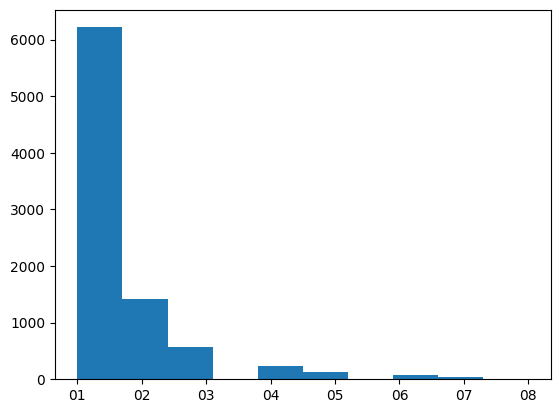

In [268]:
plt.hist(titanic['PassengerId'].apply(lambda x: pd.Series(str(x).split("_")[1])))

## Preparation

In [269]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def transform_feature_data(df):
    df[['PassengerIdSecondHalf']] = df['PassengerId'].apply(lambda x: pd.Series(str(x).split("_")[1])) 
    df = df.drop(columns=['PassengerId', 'Name'], axis='columns')    
    df[['Cabin_1', 'Cabin_2', 'Cabin_3']] = df["Cabin"].apply(lambda x: pd.Series(str(x).split("/")))
    df = df.drop(columns=['Cabin', 'Cabin_2'], axis='columns')

    return df

def transform_target_data(y):
    return y.astype(int)

In [261]:
X_train = titanic.drop('Transported', axis=1)
y_train = titanic.Transported
X_train = transform_feature_data(X_train)
y_train = transform_target_data(y_train)

In [262]:
print(X_train.shape)
print(y_train.shape)

(8693, 14)
(8693,)


In [263]:
from sklearn.neighbors import KNeighborsClassifier

cat_cols = X_train.select_dtypes("object").columns.tolist() + X_train.select_dtypes("bool").columns.tolist()
num_cols = X_train.select_dtypes("number").columns.tolist()

num_pipe= Pipeline([('imputer', SimpleImputer()),
                    ('scaler', StandardScaler())])

cat_pipe = Pipeline([('imputer', SimpleImputer()),
                     ('encoder', OneHotEncoder())])

preprocess = ColumnTransformer([("num_pipe", num_pipe, num_cols),
                                ("cat_pipe", cat_pipe, cat_cols)])

pipe = Pipeline([
    ('preprocess', preprocess),
    ('clf', KNeighborsClassifier())
])



## Training


In [264]:
from sklearn.calibration import LinearSVC
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.pipeline import FeatureUnion
from sklearn.tree import DecisionTreeClassifier

params = dict(
    preprocess__num_pipe__imputer__strategy=['median', 'mean', 'most_frequent'],
    preprocess__num_pipe__imputer__add_indicator=[True, False],
    preprocess__cat_pipe__imputer__strategy=['most_frequent'],
    clf=[
        SGDClassifier(random_state=42), 
        SVC(random_state=42), 
        RandomForestClassifier(random_state=42),
        MLPClassifier(random_state=42),
        LogisticRegression(random_state=42),
        LinearSVC(random_state=42),
        DecisionTreeClassifier(random_state=42),
    ]
)

grid_search = GridSearchCV(pipe, params, cv=5,
    scoring='accuracy', return_train_score=True, n_jobs=8
) 

In [265]:
grid_search.fit(X_train, y_train)

c:\Users\Holdmedve\Miniconda3\envs\kaggle\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.77326632 0.77177167 0.77418698 0.77717813 0.77246152 0.77131071
 0.78810825 0.78810825 0.7883384  0.7942051  0.79523991 0.79443525
 0.78166479 0.78108922 0.77970865 0.78062892 0.78385049 0.78350572
 0.78707106 0.78845209 0.78661162 0.79213389 0.79132677 0.79282394
 0.78879632 0.78879632 0.78879632 0.78799113 0.78879645 0.78776111
 0.78718541 0.78718541 0.78718541 0.78649535 0.78718574 0.78626534
 0.72840276 0.73024376 0.72897774 0.73196968 0.72932389 0.73219944
        nan        nan        nan        nan        nan        nan]
  warnings.warn(
c:\Users\Holdmedve\Miniconda3\envs\kaggle\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the train scores are non-finite: [0.78318804 0.78298654 0.78085869 0.78160623 0.77743615 0.78082993
 0.8118028  0.81186032 0.81188907 0.81263679 0.81266555 0.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'RoomService',
                                                                          'FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'PassengerIdFirstHalf']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),...
                                 LogisticRegression(random_state=42),
                                 LinearSVC(random_state=42),
                                 DecisionTreeClassifier(random_state=42),
                                 RandomForestRegressor(random_state=42)],
                         'preprocess__cat_pipe__imputer__strategy': ['most_frequent'],
                         'preprocess__num_pipe__imputer__add_indicator': [True,
                                                                          False],
                         'preprocess__num_pipe__imputer__strategy': ['median',
                                                                     'mean',
                                                                     'most_frequent']},
             return_train_score=True, scoring='accuracy')

In [266]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf': SVC(random_state=42), 'preprocess__cat_pipe__imputer__strategy': 'most_frequent', 'preprocess__num_pipe__imputer__add_indicator': False, 'preprocess__num_pipe__imputer__strategy': 'mean'}
0.7952399134192832


## Check errors

In [238]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=3)
confusion_matrix(predictions, y_train)

array([[3391,  905],
       [ 924, 3473]], dtype=int64)

## Submission

In [239]:
titanic_test = pd.read_csv("test.csv")
passenger_ids = titanic_test.PassengerId

In [240]:
X_test = transform_feature_data(titanic_test)
submission_predictions = grid_search.predict(X_test)

In [241]:
from random import sample

submission_predictions = [bool(prediction) for prediction in submission_predictions]
sample(submission_predictions, 10)

[True, False, True, False, False, True, True, True, True, True]

In [242]:
submission_df = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': submission_predictions})
submission_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [243]:
submission_df.to_csv("submission.csv", index=False)